<a href="https://colab.research.google.com/github/norisrivatsa/ML/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Gradient Descent

Linear regression is one of the simplest supervised machine learning algorithms. It models the relationship between an independent variable (X) and a dependent variable (y) by fitting a straight line.

---

## **Hypothesis Function**

For a single feature (univariate linear regression), the hypothesis is:

\[
h_\theta(x) = \theta_0 + \theta_1 x
\]

Where:
- \(\theta_0\) = intercept (bias)
- \(\theta_1\) = slope (weight)

---

## **Cost Function (Mean Squared Error)**

To measure how well the line fits the data, we use the Mean Squared Error (MSE):

\[
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
\]

Where:
- \(m\) = number of data points
- \(h_\theta(x^{(i)})\) = predicted value
- \(y^{(i)}\) = actual value

We divide by \(2m\) for convenience when computing gradients.

---

## **Gradient Descent**

Gradient descent is an optimization algorithm that updates \(\theta_0\) and \(\theta_1\) iteratively to minimize the cost function:

\[
\theta_j := \theta_j - \alpha \frac{\partial J}{\partial \theta_j}
\]

Where:
- \(\alpha\) = learning rate (controls step size)

The partial derivatives for linear regression are:

\[
\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})
\]

\[
\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}
\]

---

## **Steps to Implement**
1. Initialize parameters \(\theta_0\) and \(\theta_1\) to 0 (or random values)
2. Compute predictions \(h_\theta(x)\)
3. Calculate cost \(J(\theta)\)
4. Update parameters using gradient descent
5. Repeat until convergence

---

## **Goal**

- Fit a line through the sample data using gradient descent.
- Visualize the cost over iterations.
- Plot the final regression line.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Salary data (y) and Years of Experience (X)
data = [
    (39343.00, 1.3),
    (46205.00, 1.5),
    (37731.00, 2.0),
    (43525.00, 2.2),
    (39891.00, 2.9),
    (56642.00, 3.0),
    (60150.00, 3.2),
    (54445.00, 3.2),
    (64445.00, 3.7),
    (57189.00, 3.9),
    (63218.00, 4.0),
    (55794.00, 4.0),
    (56957.00, 4.1),
    (57081.00, 4.5),
    (61111.00, 4.9),
    (67938.00, 5.1),
    (66029.00, 5.3),
    (83088.00, 5.9),
    (81363.00, 6.0),
    (93940.00, 6.8),
    (91738.00, 7.1),
    (98273.00, 7.9),
    (101302.00, 8.2),
    (113812.00, 8.7),
    (109431.00, 9.0),
    (105582.00, 9.5),
    (116969.00, 9.6),
    (112635.00, 10.3),
    (122391.00, 10.5),
    (121872.00, 10.5)
]

# Split into X and y
y = np.array([row[0] for row in data])
X = np.array([row[1] for row in data])
m = len(X)

print(f"Number of data points: {m}")
print("First 5 values of X:", X[:5])
print("First 5 values of y:", y[:5])


Number of data points: 30
First 5 values of X: [1.3 1.5 2.  2.2 2.9]
First 5 values of y: [39343. 46205. 37731. 43525. 39891.]


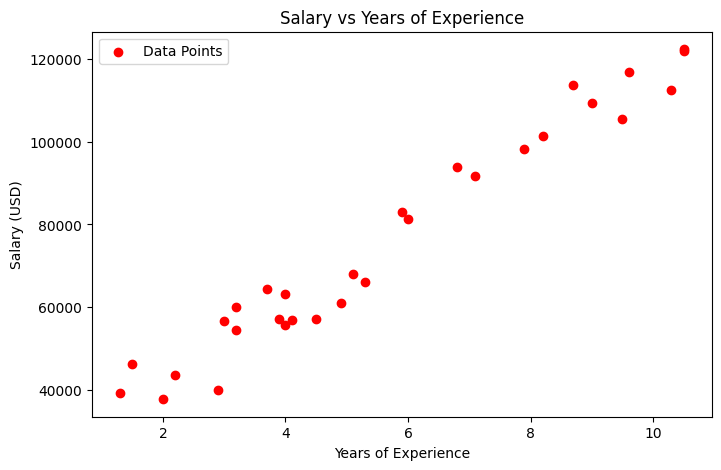

In [2]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='red', marker='o', label='Data Points')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.title('Salary vs Years of Experience')
plt.legend()
plt.show()


In [3]:
def compute_cost(theta0, theta1, X, y):
    m = len(X)
    predictions = theta0 + theta1 * X
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

def gradient_descent(X, y, alpha=0.0001, iterations=2000):
    theta0 = 0
    theta1 = 0
    m = len(X)
    cost_history = []

    for _ in range(iterations):
        predictions = theta0 + theta1 * X
        error = predictions - y
        d_theta0 = (1/m) * np.sum(error)
        d_theta1 = (1/m) * np.sum(error * X)

        theta0 -= alpha * d_theta0
        theta1 -= alpha * d_theta1

        cost_history.append(compute_cost(theta0, theta1, X, y))

    return theta0, theta1, cost_history


Intercept (theta0): 3810.5931
Slope (theta1): 12141.3192
Final Cost: 53301126.1421


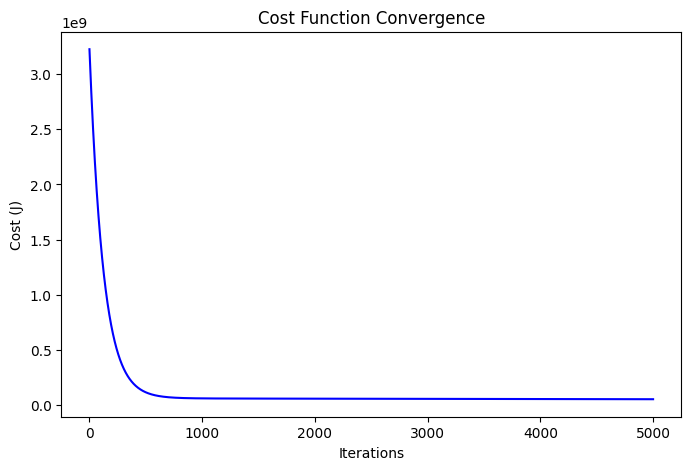

In [4]:
alpha = 0.0001   # Learning rate (small since salary values are large)
iterations = 5000

theta0, theta1, cost_history = gradient_descent(X, y, alpha, iterations)

print(f"Intercept (theta0): {theta0:.4f}")
print(f"Slope (theta1): {theta1:.4f}")
print(f"Final Cost: {cost_history[-1]:.4f}")

# Plot cost function convergence
plt.figure(figsize=(8,5))
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('Cost Function Convergence')
plt.show()


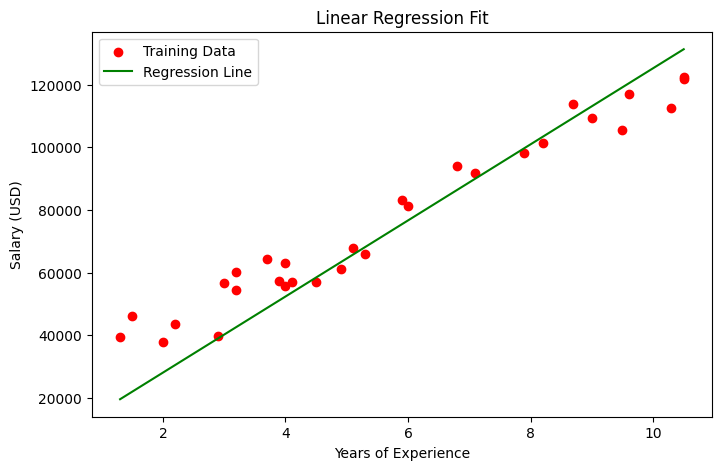

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='red', label='Training Data')
plt.plot(X, theta0 + theta1 * X, color='green', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


Predicted salary for 1.5 years of experience: $22022.57
Predicted salary for 5.0 years of experience: $64517.19
Predicted salary for 10.0 years of experience: $125223.78
Predicted salary for 12.0 years of experience: $149506.42


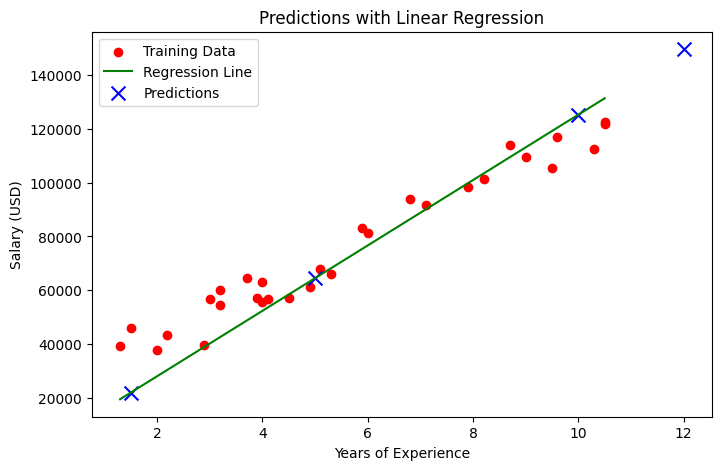

In [7]:
# Predict salaries for given years of experience
test_years = np.array([1.5, 5, 10, 12])  # you can change values
predictions = theta0 + theta1 * test_years

for years, pred_salary in zip(test_years, predictions):
    print(f"Predicted salary for {years} years of experience: ${pred_salary:.2f}")

# Visualize predictions on the same plot
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='red', label='Training Data')
plt.plot(X, theta0 + theta1 * X, color='green', label='Regression Line')
plt.scatter(test_years, predictions, color='blue', marker='x', s=100, label='Predictions')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.title('Predictions with Linear Regression')
plt.legend()
plt.show()
